# Random Forest

#### 배깅(Bagging)이란?
배깅(Bagging)은 Bootstrap Aggregating의 약자로, 보팅(Voting)과는 달리 동일한 알고리즘으로 여러 분류기를 만들어 보팅으로 최종 결정하는 알고리즘

- 배깅은 다음과 같은 방식으로 진행

(1) 동일한 알고리즘을 사용하는 일정 수의 분류기 생성  
(2) 각각의 분류기는 부트스트래핑(Bootstrapping)방식으로 생성된 샘플데이터를 학습  
(3) 최종적으로 모든 분류기가 보팅을 통해 예측 결정

※ 부트스트래핑 샘플링은 전체 데이터에서 일부 데이터의 중첩을 허용하는 방식

![008-1](https://user-images.githubusercontent.com/63298243/118589541-86aae680-b7db-11eb-800b-ae99c18140fa.png)

![008-2](https://user-images.githubusercontent.com/63298243/118589545-8874aa00-b7db-11eb-9bb1-04f37f7f8f56.png)

#### 랜덤 포레스트는 여러 개의 결정트리(Decision Tree)를 활용한 배깅 방식의 대표적인 알고리즘

+ 장점
    - 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음
    - 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있음
    - 다양한 분야에서 좋은 성능을 나타냄
    
+ 단점
    - 하이퍼 파라미터가 많아 튜닝을 위힌 시간이 많이 소요됨

## 오늘 해결할 문제

- 와인 품질 예측

와인 품질 예측을 random forest 모델을 이용하여 해결해봅시다 :)

## Import library & data

In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

## EDA

이번 전처리는 자유입니다.

상관관계 분석도 해보고

이제껏 배운것 활용해보시길~!

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

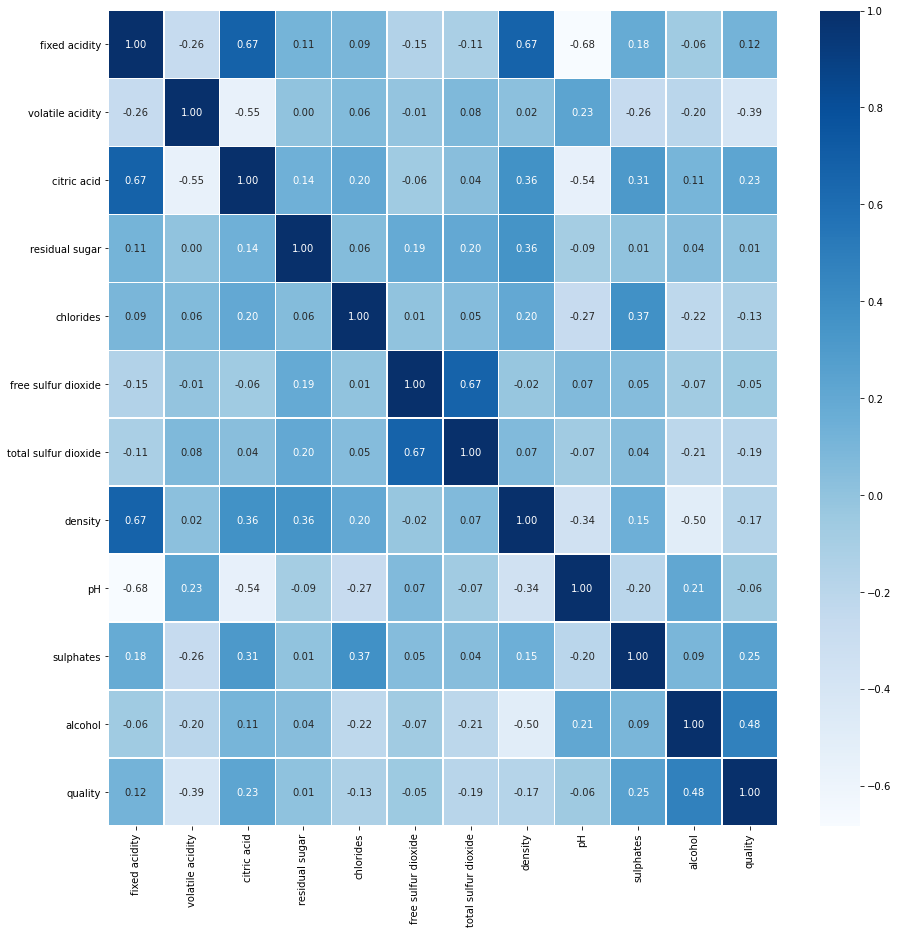

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths = .5, cmap='Blues')

## Modeling

Random Forest 모델의 파라미터
    - random_state = 1
    - max_depth = 1

사용예시

RandomForestClassifier(random_state=1, max_depth = 1)

In [7]:
y=df['quality']                      #종속 변수 Y
X=df.drop(['quality','volatile acidity','total sulfur dioxide'], axis=1)

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [24]:
rf_model = RandomForestClassifier(random_state=10, max_depth = 25)

In [25]:
rf_model.fit(X_train, y_train) 

RandomForestClassifier(max_depth=25, random_state=10)

In [26]:
r_square = rf_model.score(X_test, y_test)
print(r_square*100,"%",sep=" ")

67.5 %
